In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Load training data
train_df = pd.read_csv('emnist-letters-train.csv')
test_df = pd.read_csv('emnist-letters-test.csv')

# Separate labels and images
y_train = train_df.iloc[:, 0].values - 1  # EMNIST letters are 1-indexed
X_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values - 1
X_test = test_df.iloc[:, 1:].values

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)

# Visualize an image
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title("Sample image")
plt.show()


PermissionError: [Errno 13] Permission denied: 'emnist-letters-train.csv'

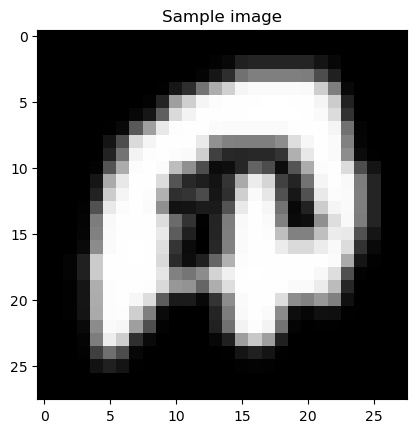

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Load training data
train_df = pd.read_csv('emnist-letters-train.csv')
test_df = pd.read_csv('emnist-letters-test.csv')

# Separate labels and images
y_train = train_df.iloc[:, 0].values - 1  # EMNIST letters are 1-indexed
X_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values - 1
X_test = test_df.iloc[:, 1:].values

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)

# Visualize an image
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title("Sample image")
plt.show()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])


C:\Users\Madan Prasad\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


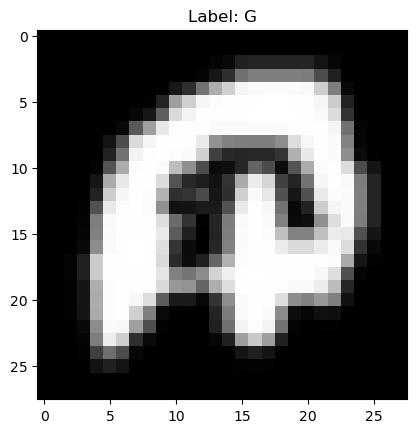

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Load data
train_df = pd.read_csv('emnist-letters-train.csv')
test_df = pd.read_csv('emnist-letters-test.csv')

# Split into X and y
y_train = train_df.iloc[:, 0].values - 1   # make labels 0-25
X_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values - 1
X_test = test_df.iloc[:, 1:].values

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 26)
y_test = to_categorical(y_test, 26)

# Visualize
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title(f"Label: {chr(np.argmax(y_train[0]) + ord('A'))}")
plt.show()


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')  # A–Z
])


C:\Users\Madan Prasad\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.6132 - loss: 1.2976 - val_accuracy: 0.8830 - val_loss: 0.3603
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8651 - loss: 0.4184 - val_accuracy: 0.9027 - val_loss: 0.2943
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.8942 - loss: 0.3284 - val_accuracy: 0.9088 - val_loss: 0.2736
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9043 - loss: 0.2924 - val_accuracy: 0.9149 - val_loss: 0.2539
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9139 - loss: 0.2615 - val_accuracy: 0.9109 - val_loss: 0.2620
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9184 - loss: 0.2399 - val_accuracy: 0.9140 - val_loss: 0.2470
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9235 - loss: 0.2258 - val_accuracy: 0.9213 - val_loss: 0.2337
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9304 - loss: 0.2043 - 

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9306 - loss: 0.2365
Test Accuracy: 92.59%


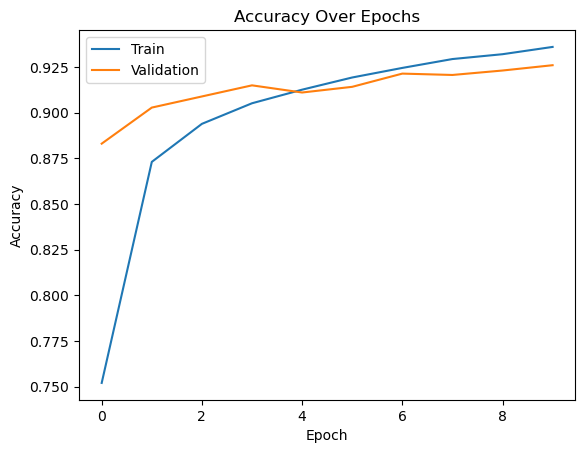

In [8]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

# Plot learning curves
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


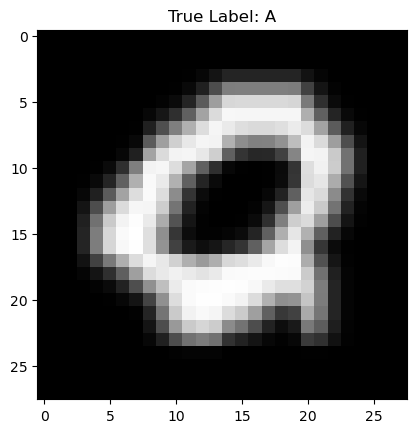

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted: A


In [9]:
idx = 120
plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
plt.title("True Label: " + chr(np.argmax(y_test[idx]) + ord('A')))
plt.show()

pred = model.predict(X_test[idx].reshape(1, 28, 28, 1))
print("Predicted:", chr(np.argmax(pred) + ord('A')))


In [10]:
model.save("character_recognition_model.h5")
